In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
df = pd.read_excel('E:\\Papers\\Air Quality\\AirQualityUCI.xls')

In [4]:
print(df.head())
print(df.shape)

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000 

In [5]:
df.drop('Date', axis=1, inplace=True)

In [6]:
#the column seems to have a lot of misplaced data(-200)
df.drop('NMHC(GT)', axis=1, inplace=True)
df.head()


,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [7]:
#-200 seems to indicate missing data
df.replace(to_replace= -200, value= np.NaN, inplace= True)

In [8]:
def VALUE_CORRECTION(col):
    df[col] = df.groupby('Time')[col].transform(lambda x:x.fillna(x.mean()))

In [9]:
#filing empty spaces with the mean
col_list = df.columns[1:12]

for i in col_list:
    VALUE_CORRECTION(i)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   object 
 1   CO(GT)         9357 non-null   float64
 2   PT08.S1(CO)    9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             8991 non-null   float64
dtypes: float64(12), object(1)
memory usage: 950.4+ KB


In [11]:
df.fillna(method='ffill', inplace= True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   object 
 1   CO(GT)         9357 non-null   float64
 2   PT08.S1(CO)    9357 non-null   float64
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(12), object(1)
memory usage: 950.4+ KB


In [13]:
# data visualisations


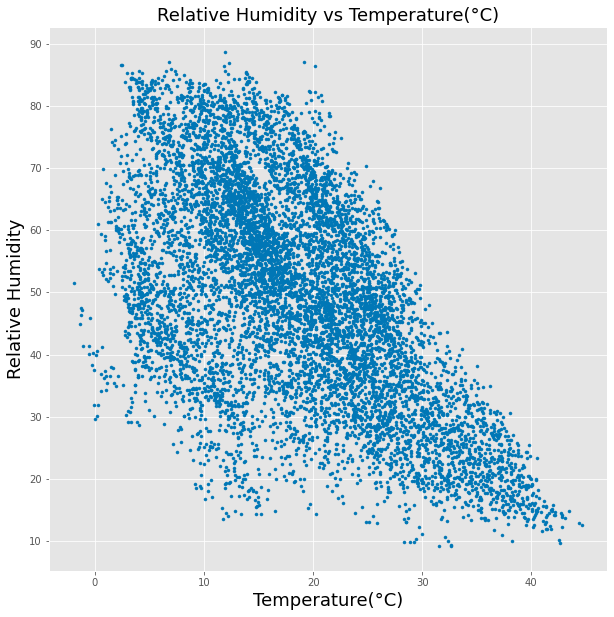

In [30]:
#RH vs T
plt.figure(figsize=(10,10))
plt.xlabel('Temperature(°C)', fontsize=18, c='black')
plt.ylabel('Relative Humidity', fontsize=18, c='black')
plt.title("Relative Humidity vs Temperature(°C)", fontsize=18, c='black')
plt.scatter(df['T'], df['RH'], marker='.', aa=True, c = '#0077b6')
plt.savefig('RH_vs_Temp.png', dpi=1000)

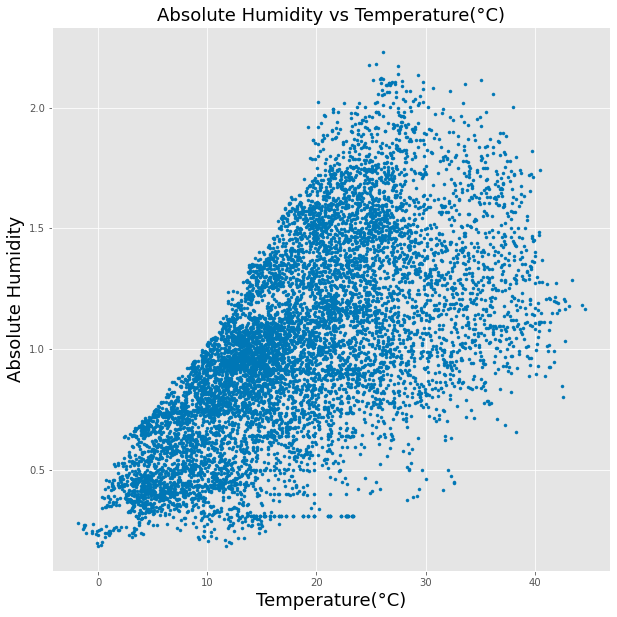

In [31]:
#AH vs T
plt.figure(figsize=(10,10))
plt.xlabel('Temperature(°C)', fontsize=18, c='black')
plt.ylabel('Absolute Humidity', fontsize=18, c='black')
plt.title("Absolute Humidity vs Temperature(°C)", fontsize=18, c='black' )
plt.scatter(df['T'], df['AH'], marker='.', aa=True, c = '#0077b6')
plt.savefig('AH_vs_Temp.png', dpi=1000)

In [15]:
df.corr()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.820081,0.861000,0.853034,0.792034,-0.669141,0.700298,0.592592,0.790934,0.055833,-0.010635,0.023002
PT08.S1(CO),0.820081,1.000000,0.885031,0.894152,0.664490,-0.774123,0.614832,0.685185,0.899807,0.052363,0.107356,0.131365
C6H6(GT),0.861000,0.885031,1.000000,0.982088,0.668107,-0.738118,0.591387,0.767308,0.866138,0.201653,-0.067621,0.162929
PT08.S2(NMHC),0.853034,0.894152,0.982088,1.000000,0.659376,-0.798728,0.623820,0.778516,0.880754,0.244184,-0.096886,0.181237
NOx(GT),0.792034,0.664490,0.668107,0.659376,1.000000,-0.611741,0.772988,0.246416,0.721881,-0.201623,0.144142,-0.148658
PT08.S3(NOx),-0.669141,-0.774123,-0.738118,-0.798728,-0.611741,1.000000,-0.620693,-0.541609,-0.797854,-0.148211,-0.050049,-0.225548
NO2(GT),0.700298,0.614832,0.591387,0.623820,0.772988,-0.620693,1.000000,0.185699,0.662757,-0.122517,-0.134606,-0.313949
PT08.S4(NO2),0.592592,0.685185,0.767308,0.778516,0.246416,-0.541609,0.185699,1.000000,0.593720,0.560556,-0.035685,0.613508
PT08.S5(O3),0.790934,0.899807,0.866138,0.880754,0.721881,-0.797854,0.662757,0.593720,1.000000,-0.024804,0.120445,0.068473
T,0.055833,0.052363,0.201653,0.244184,-0.201623,-0.148211,-0.122517,0.560556,-0.024804,1.000000,-0.581546,0.640654


In [16]:
#creating linear model
from sklearn.model_selection import train_test_split
X=df[['CO(GT)', 'PT08.S1(CO)',	'C6H6(GT)',	'PT08.S2(NMHC)','NOx(GT)',	'PT08.S3(NOx)',	'NO2(GT)',	'PT08.S4(NO2)',	'PT08.S5(O3)',	'T']]
y=df[['RH','AH']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)


In [17]:
#hyperparameter optimisation
n_estimators=[100,200,500,750,1000,1100,1200]
max_depth=[3,5,10,15,20]
booster=['gbtree']
learning_rate=[0.03, 0.06, 0.1, 0.15, 0.2]
min_child_weight=[1,2,3,4]
base_score=[0.2,0.25, 0.5, 0.75]

hyperparameter_grid={'n_estimators':n_estimators,
                     'max_depth':max_depth,
                     'learning_rate':learning_rate,
                     'min_child_weight':min_child_weight,
                     'booster':booster,
                     'base_score':base_score}

In [18]:
import xgboost
xreg=xgboost.XGBRegressor()  #for RH
xreg1=xgboost.XGBRegressor()  #for AH

In [19]:
#for RH
y1=df[['RH']]
X_train, X_test, y1_train, y1_test=train_test_split(X, y1, test_size=0.3)

In [20]:
from sklearn.model_selection import RandomizedSearchCV
#FOR RH
random_cv1=RandomizedSearchCV(estimator=xreg,
                             param_distributions=hyperparameter_grid,
                             n_iter=50,
                             verbose=5,
                             n_jobs=4,
                             scoring='neg_mean_squared_error',
                             return_train_score=True,
                             random_state=42)

In [21]:
random_cv1.fit(X_train, y1_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   param_distributions={'ba

In [22]:
random_cv1.best_estimator_

XGBRegressor(base_score=0.2, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=1200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
xreg=xgboost.XGBRegressor(base_score=0.2, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, monotone_constraints=None,
             n_estimators=1200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)
xreg.fit(X_train, y1_train)

XGBRegressor(base_score=0.2, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=1200, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=False, verbosity=None)

In [24]:
y1_pred=xreg.predict(X_test)
y1_pred

array([39.41457 , 17.259514, 32.77743 , ..., 28.693926, 71.10469 ,
       50.74088 ], dtype=float32)

In [25]:
from sklearn.metrics import r2_score
r2_score(y1_test, y1_pred)

0.9294381357143047

In [26]:
#for AH
y2=df[['AH']]
X_train, X_test, y2_train, y2_test=train_test_split(X, y2, test_size=0.3)

In [27]:
xreg1=xgboost.XGBRegressor()
random_cv2=RandomizedSearchCV(estimator=xreg,
                             param_distributions=hyperparameter_grid,
                             n_iter=50,
                             verbose=5,
                             n_jobs=4,
                             scoring='neg_mean_squared_error',
                             return_train_score=True,
                             random_state=42)

In [29]:
random_cv2.random_cv2.best_estimator_(X_train, y2_train)

AttributeError: 'RandomizedSearchCV' object has no attribute 'random_cv2'

In [30]:
random_cv2.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [31]:
xreg1=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.06, max_delta_step=0, max_depth=5,
             min_child_weight=4, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)
xreg1.fit(X_train, y2_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.06, max_delta_step=0, max_depth=5,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=False, verbosity=None)

In [32]:
y2_pred=xreg1.predict(X_test)
y2_pred

array([0.88066304, 1.094158  , 0.3863238 , ..., 0.89309347, 0.5401875 ,
       1.2316906 ], dtype=float32)

In [33]:
r2_score(y2_test, y2_pred)

0.9207693242836268

In [ ]:
# saving the two models

xreg.save_model('RH_XREG.json')
xreg1.save_model('AH_XREG.json')

In [34]:
df2 = pd.read_excel('E:\\Papers\\Air Quality\\AirQualityUCI.xls')
df2.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [35]:
df2['Time'] = pd.to_datetime(df2.Date.astype(str)+' '+df2.Time.astype(str))

In [36]:
df['Time'] = df2['Time']
df.head()

,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10 19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10 20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10 21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10 22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [37]:
# plotting results

In [38]:
df['RH_pred_xg']=xreg.predict(X)

In [2]:
df = pd.read_csv(r'E:\Papers\Air Quality\Final\final_results.csv')

In [5]:
plt.figure(figsize=(10,7))
plt.plot_date(df.Time, df.RH, marker='.', label="True", c = '#5e8bff')
plt.plot_date(df.Time, df.RH_AVG, marker='.', label="Predicted")
plt.title("Comparison of True and Predicted values of Relative Humidity at various times (with boosting)", fontsize=20)
plt.xlabel("Datetime", fontsize=20)
plt.ylabel("Relative Humidity", fontsize=20)
plt.legend(fontsize=15, facecolor='white', markerscale=2)

Error in callback <function flush_figures at 0x0000025E54B859D0> (for post_execute):


KeyboardInterrupt: 

In [40]:
df['AH_pred_xg']=xreg1.predict(X)

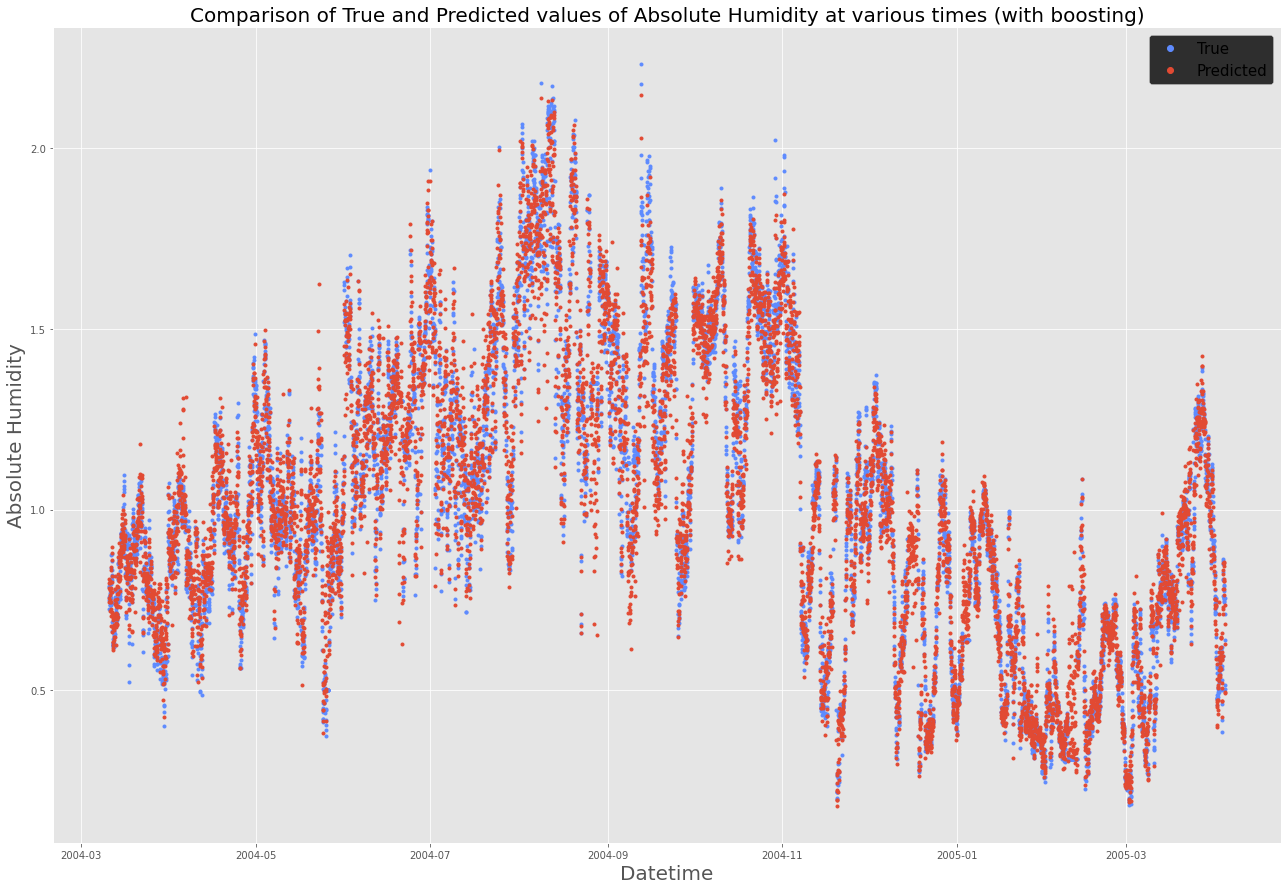

In [41]:
plt.figure(figsize=(22,15))
plt.plot_date(df.Time, df.AH, marker='.', label="True", c = '#5e8bff')
plt.plot_date(df.Time, df.AH_pred_xg, marker='.', label="Predicted")
plt.title("Comparison of True and Predicted values of Absolute Humidity at various times (with boosting)", fontsize=20)
plt.xlabel("Datetime", fontsize=20)
plt.ylabel("Absolute Humidity", fontsize=20)
plt.legend(fontsize=15, facecolor='black', markerscale=2)

In [43]:
df.to_csv('RGBoost_Implemented.csv')